In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import seaborn as sns
#import rpy2 
import os, sys

%matplotlib inline

Aggregate all ML outcomes from notebook 001 in order to explore over performance across fingerprint, classifier etc. Look at relationship between number of positive or negative outcomes and performance (Spearman plots)

In [42]:
TOP = os.getcwd().replace("notebooks", "")
D1 = TOP + 'data/processed/'
figures_dir = TOP + 'reports/figures/'

In [3]:
Perf_mgrn = pd.read_csv(D1 + '/ML_comparision_mrgn_all_mean_140823.csv' )
Perf_bio = pd.read_csv(D1 + '/ML_comparision_bio_all_summary_140823.csv' )
Perf_hybrid =  pd.read_csv(D1 + '/ML_comparision_hybrid_all_summary_140823.csv' )
Perf_ca = pd.read_csv(D1 + '/ML_comparision_ca_all_summary_140823.csv') 
Perf_cba = pd.read_csv(D1 + '/ML_comparision_cba_all_summary_140823.csv' )

df_tox_counts = pd.read_csv(D1+'tox_counts.csv')

In [4]:
df_tox_counts.columns

Index(['Unnamed: 0', 'acu_calcium', 'acu_clinical_signs',
       'acu_intestine_large', 'acu_intestine_small', 'acu_lung',
       'acu_mortality', 'acu_stomach', 'chr_5._nucleotidase', 'chr_.other.',
       ...
       'sub_ureter', 'sub_urethra', 'sub_uric_acid', 'sub_urinary_bladder',
       'sub_urobilinogen', 'sub_uterus', 'sub_vagina', 'sub_volume',
       'sub_water_consumption', 'sub_zinc'],
      dtype='object', length=921)

In [5]:
df_tox_counts.drop(['Unnamed: 0'] , axis = 1, inplace = True)

In [6]:
effects = ['chr_body_weight', 'chr_liver', 'chr_kidney',
       'chr_spleen',  'chr_lung', 'chr_adrenal_gland','sub_body_weight',
       'sub_liver', 'sub_kidney', 'sub_spleen', 'sub_lung', 'sac_liver', 'mgr_liver',
       'mgr_kidney', 'mgr_spleen', 'dev_liver', 'dev_kidney', 'dnt_clinical_signs']

In [7]:
df_counts = df_tox_counts.T[df_tox_counts.T.index.isin(effects)]
df_counts.columns = ['pos', 'neg']
df_counts['total'] = df_counts.pos + df_counts.neg
df_counts

,pos,neg,total
chr_adrenal_gland,127,389,516
chr_body_weight,434,82,516
chr_kidney,251,265,516
chr_liver,325,191,516
chr_lung,110,406,516
chr_spleen,134,382,516
dev_kidney,63,334,397
dev_liver,66,331,397
dnt_clinical_signs,49,44,93
mgr_kidney,111,180,291


In [8]:
df_counts = df_counts.reset_index()


In [9]:
df_counts.columns = ['tox', 'pos', 'neg', 'total']
df_counts

,tox,pos,neg,total
0,chr_adrenal_gland,127,389,516
1,chr_body_weight,434,82,516
2,chr_kidney,251,265,516
3,chr_liver,325,191,516
4,chr_lung,110,406,516
5,chr_spleen,134,382,516
6,dev_kidney,63,334,397
7,dev_liver,66,331,397
8,dnt_clinical_signs,49,44,93
9,mgr_kidney,111,180,291


In [31]:
pos_gte= []
for i, row in df_counts.iterrows():
    if row['pos']> row['neg']:
        pos_gte.append(row['tox'])

In [32]:
neg_gte= []
for i, row in df_counts.iterrows():
    if row['pos'] < row['neg']:
        neg_gte.append(row['tox'])

In [33]:
neg_gte

['chr_adrenal_gland',
 'chr_kidney',
 'chr_lung',
 'chr_spleen',
 'dev_kidney',
 'dev_liver',
 'mgr_kidney',
 'mgr_spleen',
 'sub_lung',
 'sub_spleen']

In [35]:
len(pos_gte)

8

In [10]:
df_counts.shape

(18, 4)

In [11]:
Perf_mgrn.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'test_f1', 'test_f1.1', 'test_sensitivity',
       'test_sensitivity.1', 'test_specificity', 'test_specificity.1',
       'test_accuracy', 'test_accuracy.1', 'test_precision',
       'test_precision.1'],
      dtype='object')

In [12]:
Perf_mgrn.columns = ['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']

In [13]:
Perf_bio.columns = ['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']
Perf_hybrid.columns =['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']
Perf_ca.columns = ['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']
Perf_cba.columns = ['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']

In [14]:
def pref_files(df, dt):
    df.columns = ['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']
    df = df.drop([0,1])
    df['dt'] = dt 
    df = pd.merge(df, df_counts, on = 'tox', how = 'left')
    return df

In [15]:
mylst = ['mrgn', 'gene', 'cb', 'ca', 'cba']

In [16]:
mylst2 = list(zip(mylst, [Perf_mgrn, 
Perf_bio, 
Perf_hybrid,
Perf_ca, 
Perf_cba ]))

In [17]:
for e in mylst2:
    a,b = e
    print(a)

mrgn
gene
cb
ca
cba


In [18]:
mylst3 = []
for e in mylst2:
    a,b = e
    mylst3.append(pref_files(b,a))

In [19]:
final_df = pd.concat(mylst3)

In [20]:
final_df.shape

(720, 16)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tox               720 non-null    object
 1   classifier        720 non-null    object
 2   mean_f1           720 non-null    object
 3   std_f1            720 non-null    object
 4   mean_sensitivity  720 non-null    object
 5   std_sensitivity   720 non-null    object
 6   mean_specificity  720 non-null    object
 7   std_specificity   720 non-null    object
 8   mean_accuracy     720 non-null    object
 9   std_accuracy      720 non-null    object
 10  mean_precision    720 non-null    object
 11  std_precision     720 non-null    object
 12  dt                720 non-null    object
 13  pos               720 non-null    int64 
 14  neg               720 non-null    int64 
 15  total             720 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 95.6+ KB


In [23]:
#final_df['mean_f1'].hist()

In [23]:
final_df[final_df['tox']=='dnt_clinical_signs'].head()

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,pos,neg,total
0,dnt_clinical_signs,ANN1,0.745,0.056,0.946,0.074,0.08,0.179,0.606,0.091,0.616,0.058,mrgn,49,44,93
1,dnt_clinical_signs,GenRA,0.668,0.175,0.704,0.22,0.41,0.188,0.592,0.187,0.64,0.139,mrgn,49,44,93
2,dnt_clinical_signs,Gradient Boosting,0.698,0.074,0.786,0.121,0.29,0.225,0.588,0.108,0.636,0.09,mrgn,49,44,93
3,dnt_clinical_signs,KNN,0.71,0.048,0.868,0.135,0.12,0.179,0.574,0.062,0.606,0.024,mrgn,49,44,93
4,dnt_clinical_signs,LR,0.723,0.107,0.85,0.224,0.29,0.175,0.622,0.115,0.646,0.065,mrgn,49,44,93


In [24]:
final_df['mean_f1'] = final_df['mean_f1'].astype(float)

In [55]:
final_df['mean_specificity'] = final_df['mean_specificity'].astype(float)

final_df['mean_sensitivity'] = final_df['mean_sensitivity'].astype(float)

In [25]:
classifier_dict = {'Gradient Boosting' : 'GB', 'Random Forest' : 'RF'}

final_df['classifier'] = final_df['classifier'].replace(classifier_dict)

In [36]:
#final_df

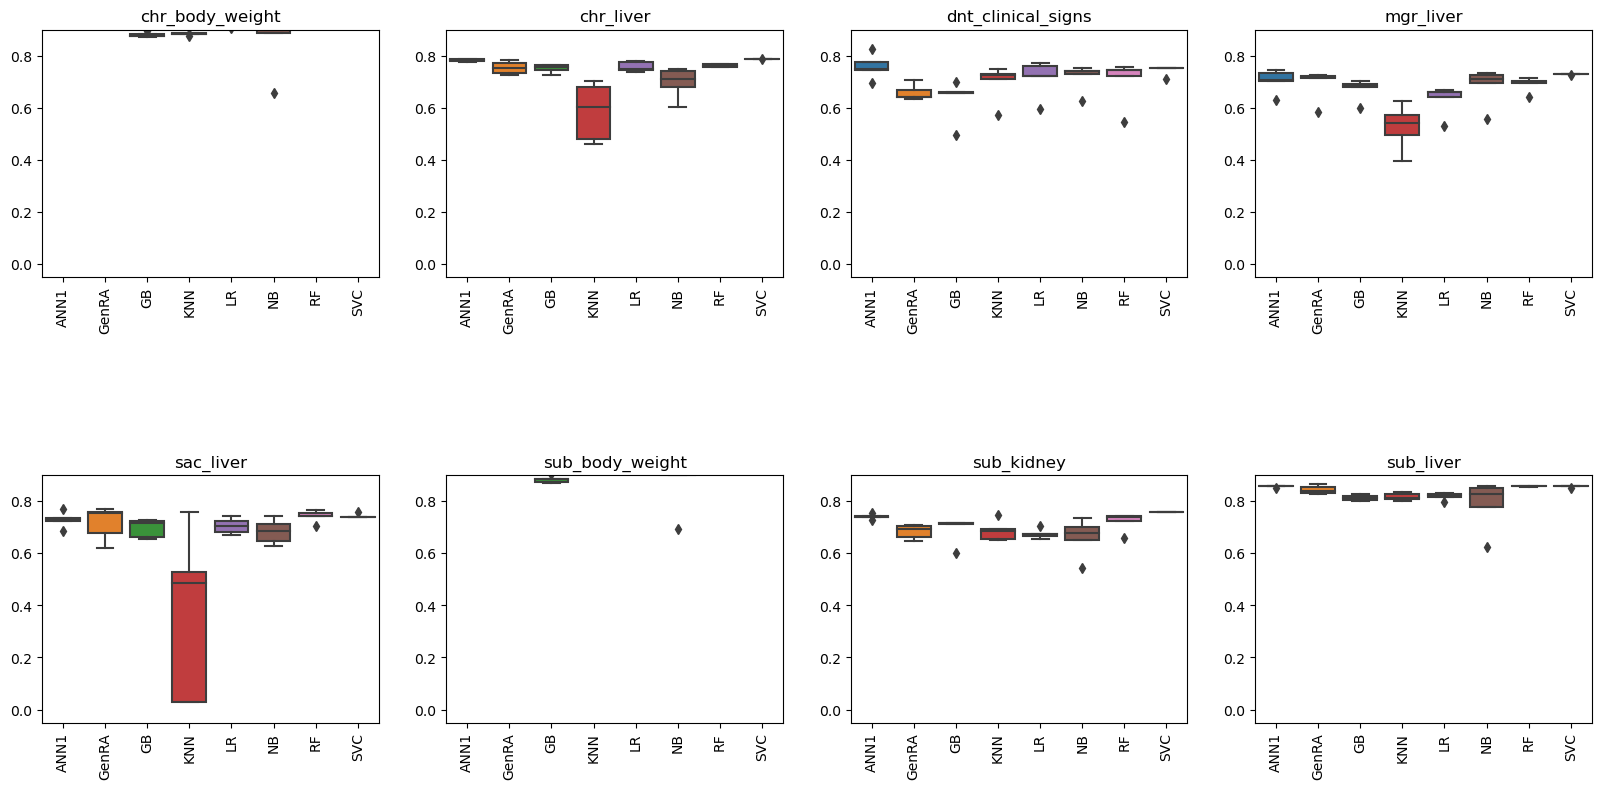

In [43]:
f = plt.figure(figsize = (20,9))
k=0
for e in pos_gte:
    k+=1
    ax = plt.subplot(2, 4, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_f1', data = final_df[final_df['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)
f.savefig(figures_dir+'Figure2a.png', dpi = 300, bbox_inches = 'tight')

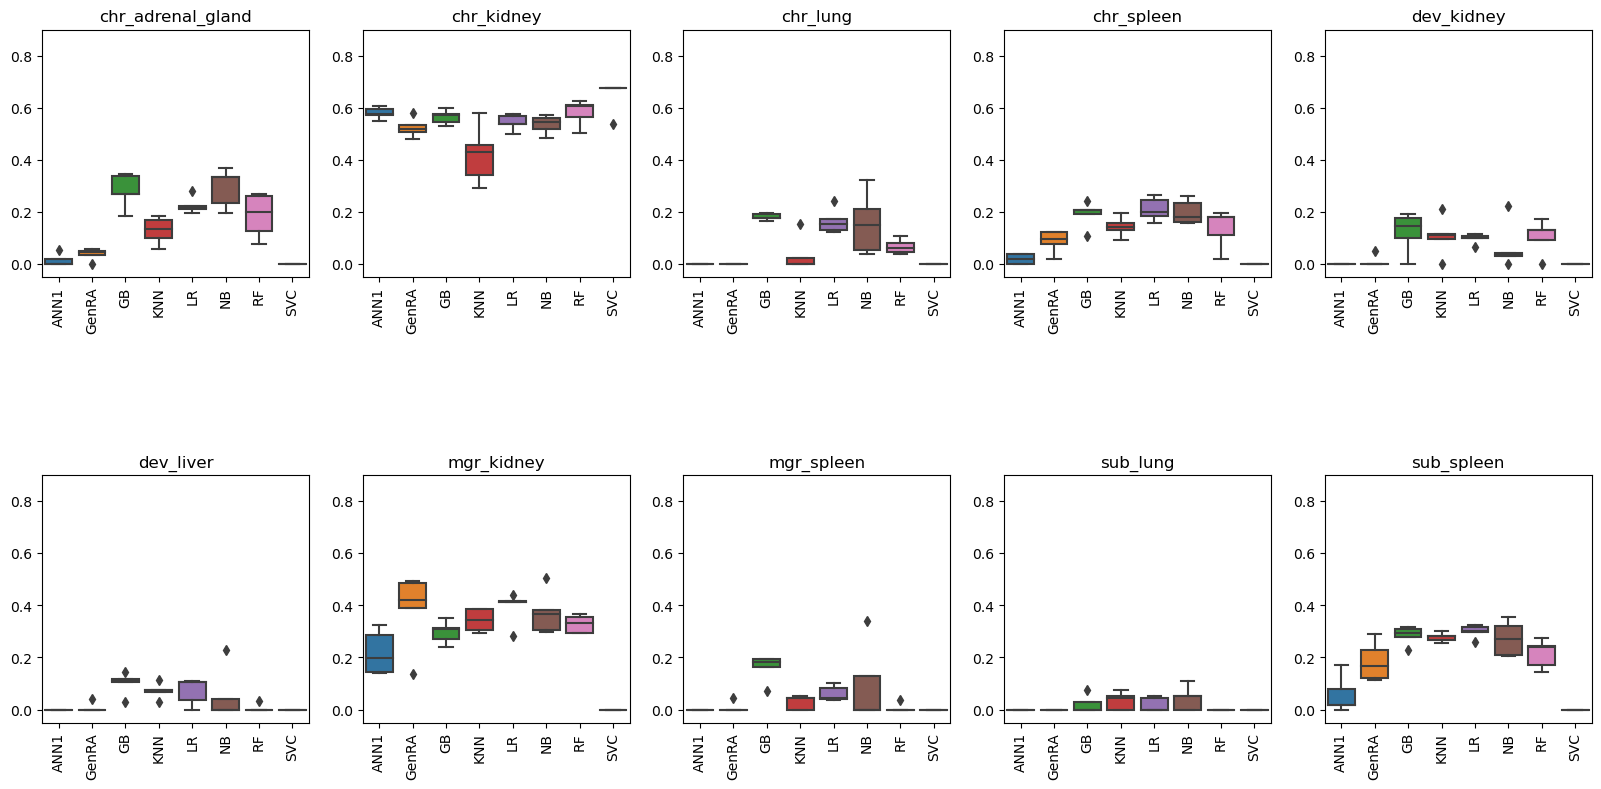

In [44]:
f = plt.figure(figsize = (20,9))
k=0
for e in neg_gte:
    k+=1
    ax = plt.subplot(2, 5, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_f1', data = final_df[final_df['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)
f.savefig(figures_dir+'Figure2b.png', dpi = 300, bbox_inches = 'tight')

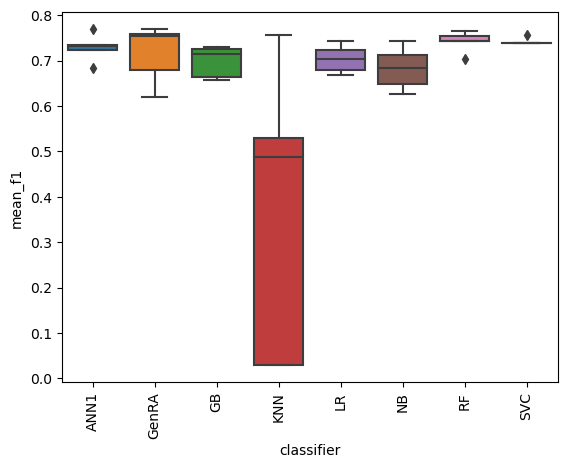

In [26]:
g = sns.boxplot(x = "classifier", y = "mean_f1", data = final_df[final_df['tox']=='sac_liver'] )
g.set_xticklabels(g.get_xticklabels(), rotation=90);

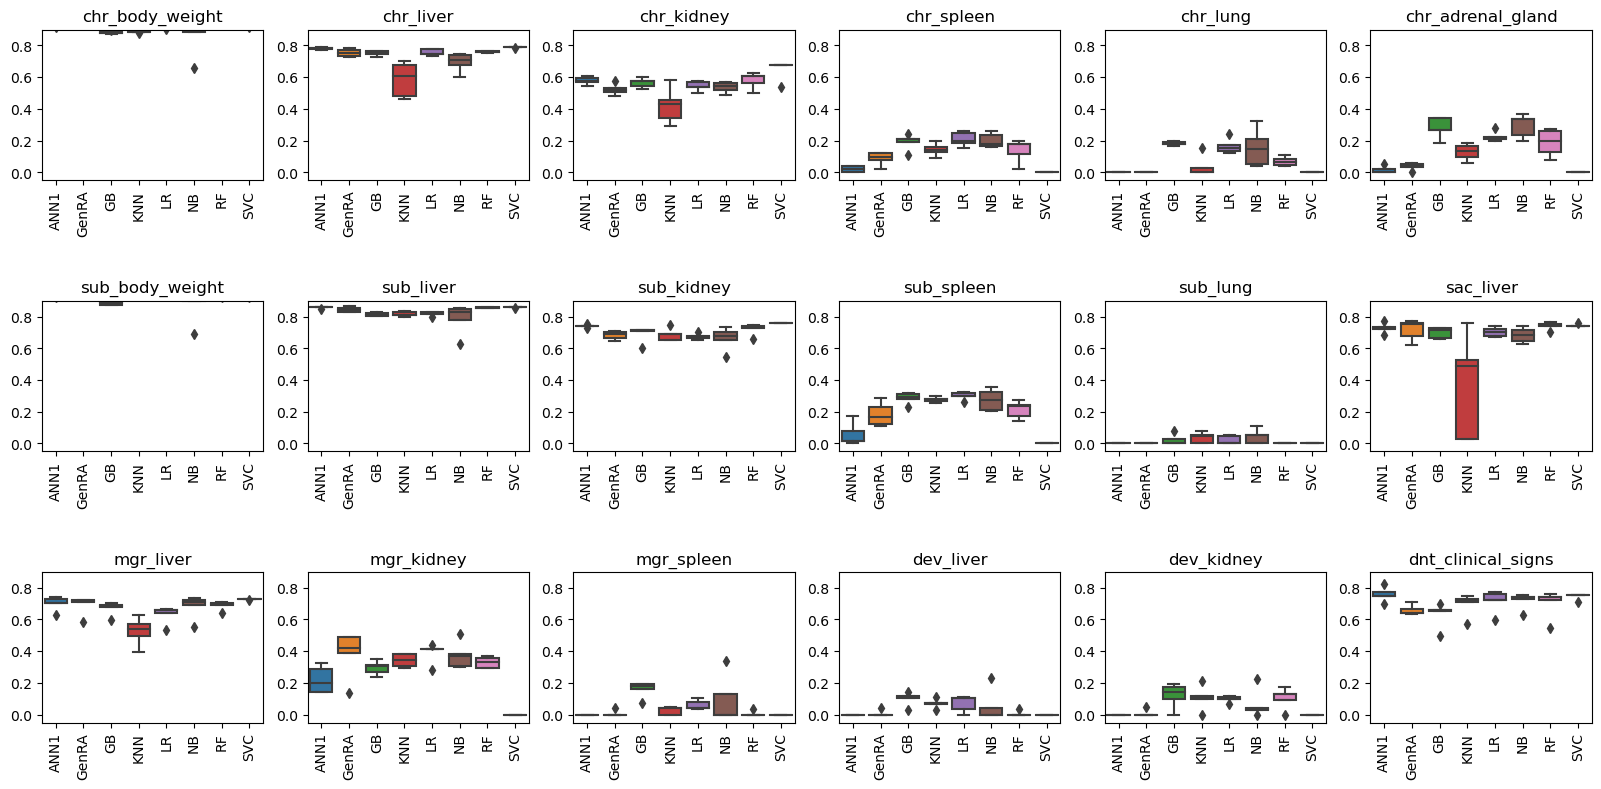

In [28]:
f = plt.figure(figsize = (20,9))
k=0
for e in effects:
    k+=1
    ax = plt.subplot(3, 6, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_f1', data = final_df[final_df['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)
f.savefig(figures_dir+'Figure2.png', dpi = 300, bbox_inches = 'tight')

In [45]:
final_df.classifier.unique()

array(['ANN1', 'GenRA', 'GB', 'KNN', 'LR', 'NB', 'RF', 'SVC'],
      dtype=object)

In [46]:
final_df.columns

Index(['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity',
       'std_sensitivity', 'mean_specificity', 'std_specificity',
       'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision',
       'dt', 'pos', 'neg', 'total'],
      dtype='object')

In [47]:
final_df['mean_f1'].where(final_df['mean_f1'] >0.1).count()

515

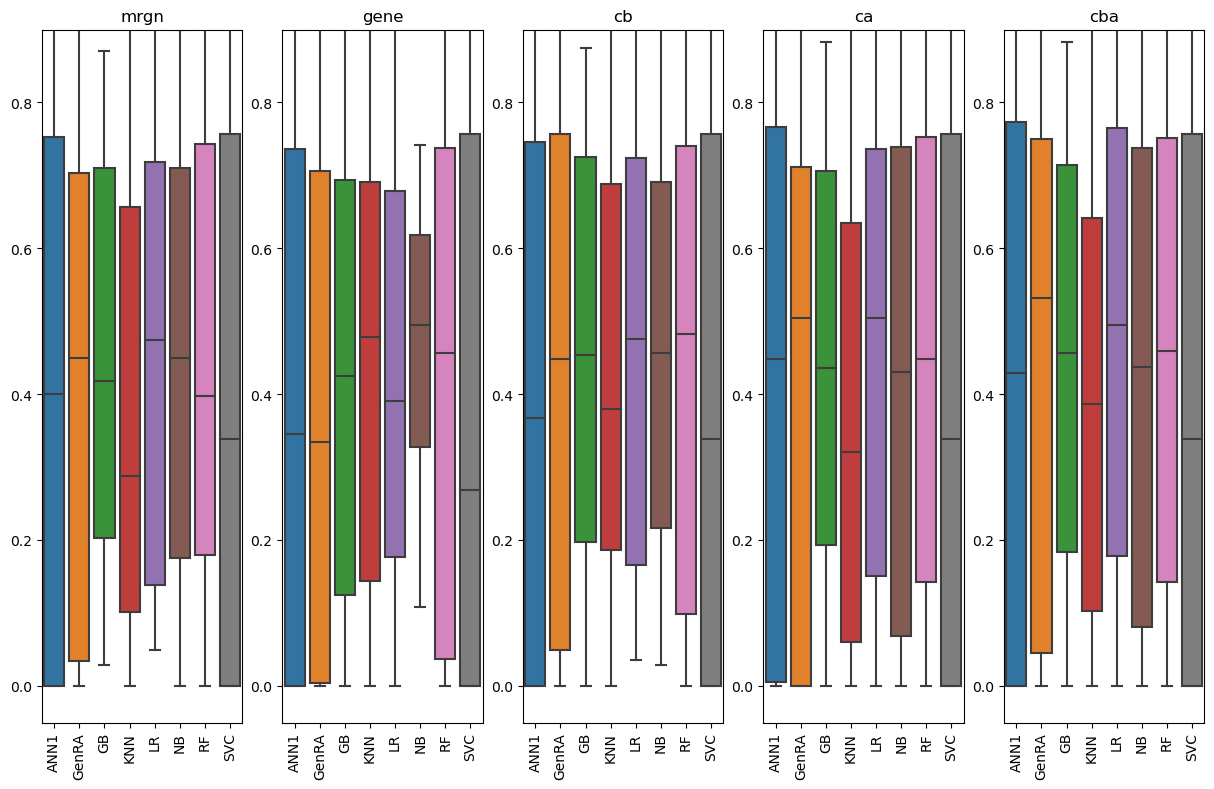

In [32]:
f = plt.figure(figsize = (15,9))
k=0
for e in final_df.dt.unique().tolist():
    k+=1
    ax = plt.subplot(1, 5, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_f1', data = final_df[(final_df['dt'] ==e) ])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)
#f.savefig(figures_dir+'Figure1.png', dpi = 300, bbox_inches = 'tight')

In [33]:
final_df.classifier.unique().tolist()

['ANN1', 'GenRA', 'GB', 'KNN', 'LR', 'NB', 'RF', 'SVC']

In [34]:
import scipy as sp

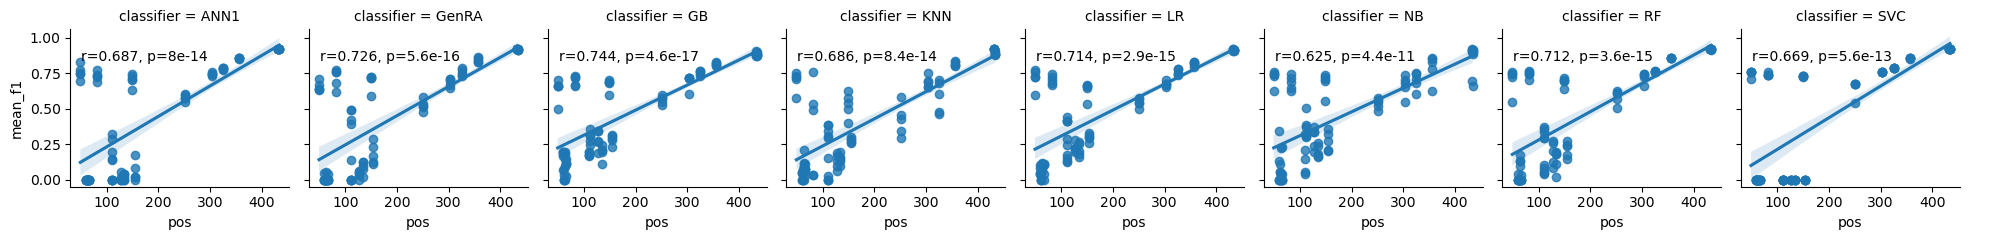

In [35]:
#f = plt.figure(figsize=(45,10))

def annotate(data, **kws):
    r, p = sp.stats.spearmanr( data['pos'],data['mean_f1'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.3f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)


g = sns.FacetGrid(final_df, col ='classifier', height=2.5, aspect = 1)
# map the above form facetgrid with some attributes
g.map(sns.regplot,  "pos","mean_f1",).add_legend()

g.map_dataframe(annotate)

g.savefig(figures_dir+'FigureS1.png', dpi =300)

In [48]:
final_df[final_df['tox'] == 'dnt_clinical_signs'].groupby('classifier').agg({'mean_f1' : np.mean})

,mean_f1
classifier,
ANN1,0.7574
GB,0.6334
GenRA,0.6576
KNN,0.6964
LR,0.7146
NB,0.7182
RF,0.7028
SVC,0.7452


In [65]:
final_df[final_df['tox'] == 'dnt_clinical_signs'].groupby('classifier').agg({'mean_BA' : np.mean})

,mean_BA
classifier,
ANN1,0.5837
GB,0.4817
GenRA,0.5270
KNN,0.4848
LR,0.5802
NB,0.4883
RF,0.5009
SVC,0.4950


In [57]:
final_df['mean_BA'] = final_df[['mean_sensitivity','mean_specificity']].apply(lambda x: (x['mean_sensitivity'] + x['mean_specificity'])*0.5, axis = 1)

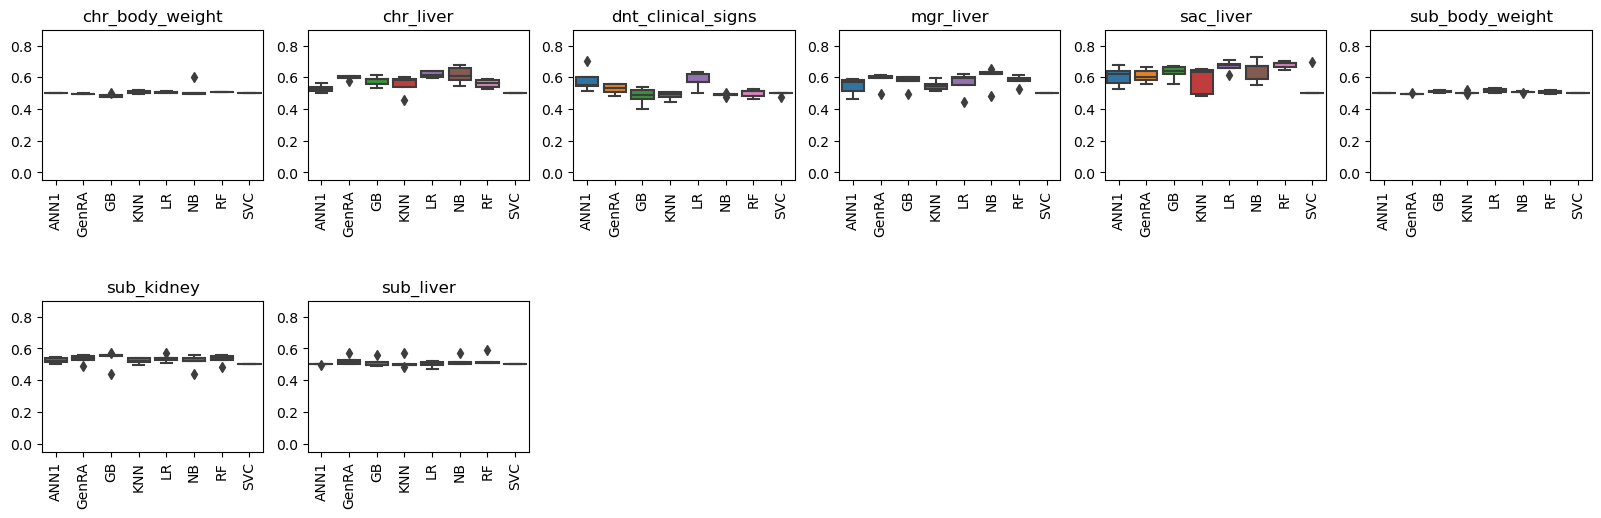

In [64]:
f = plt.figure(figsize = (20,9))
k=0
for e in pos_gte:
    k+=1
    ax = plt.subplot(3, 6, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_BA', data = final_df[final_df['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)

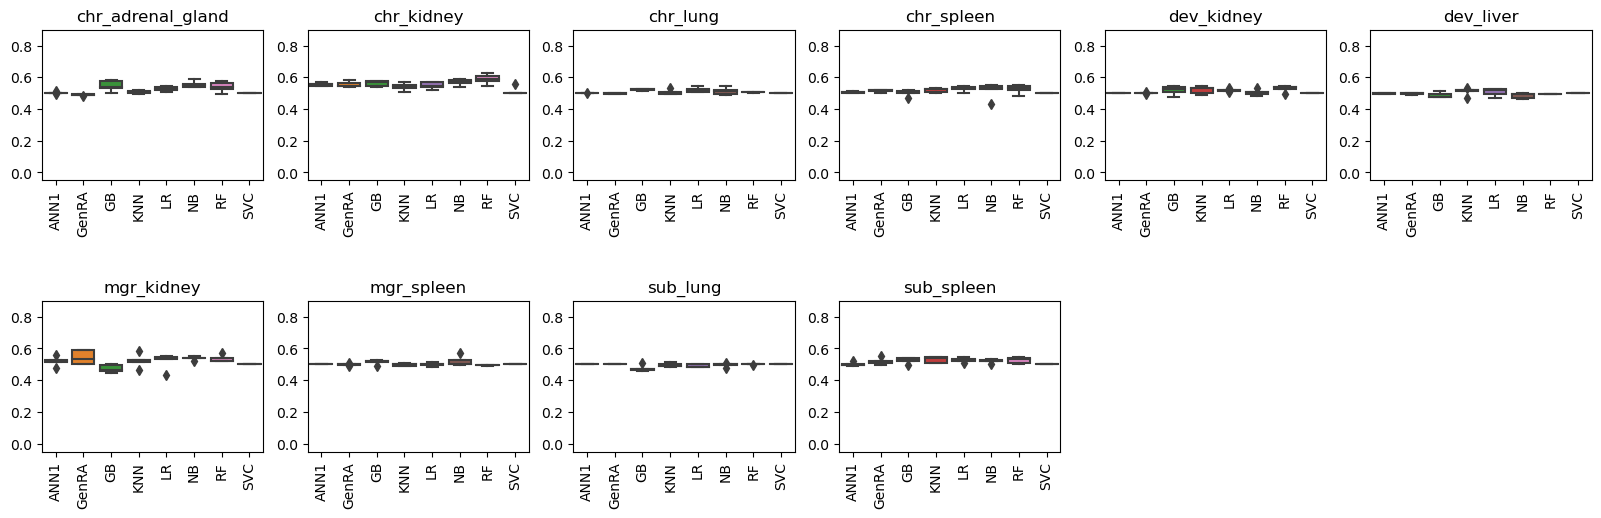

In [61]:
f = plt.figure(figsize = (20,9))
k=0
for e in neg_gte:
    k+=1
    ax = plt.subplot(3, 6, k)
    g = sns.boxplot(x = 'classifier', y = 'mean_BA', data = final_df[final_df['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,0.9)
    plt.subplots_adjust(hspace = 0.8)

In [37]:
final_df.tox.unique()

array(['dnt_clinical_signs', 'chr_body_weight', 'chr_liver', 'chr_kidney',
       'chr_spleen', 'chr_adrenal_gland', 'chr_lung', 'sub_body_weight',
       'sub_liver', 'sub_kidney', 'sub_spleen', 'sub_lung', 'mgr_liver',
       'mgr_kidney', 'mgr_spleen', 'sac_liver', 'dev_liver', 'dev_kidney'],
      dtype=object)

In [38]:
final_df[final_df['tox'].isin(['mgr_liver'])].groupby('classifier').agg({'mean_f1' : np.mean}).mean()

mean_f1    0.66565
dtype: float64

In [70]:
final_df[final_df['tox'].isin(['sac_liver'])].groupby('classifier').agg({'mean_f1' : np.mean})

,mean_f1
classifier,
ANN1,0.7286
GB,0.6978
GenRA,0.7164
KNN,0.3662
LR,0.7038
NB,0.6826
RF,0.7416
SVC,0.7426


In [66]:
final_df[final_df['tox'].isin(['mgr_liver'])].groupby('classifier').agg({'mean_BA' : np.mean})

,mean_BA
classifier,
ANN1,0.5437
GB,0.5734
GenRA,0.5823
KNN,0.5476
LR,0.5623
NB,0.6027
RF,0.5794
SVC,0.5000


In [71]:
for e in ['std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity', 'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision']:
    final_df[e] = final_df[e].astype(float)

In [72]:
final_df.describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,pos,neg,total,mean_BA
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.425631,0.058136,0.456926,0.069839,0.593342,0.066999,0.704818,0.038950,0.443319,0.088251,181.444444,238.555556,420.000000,0.525134
std,0.340986,0.054820,0.395830,0.068100,0.381160,0.071431,0.112813,0.034401,0.297856,0.120228,128.893536,127.959583,137.366853,0.045316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404000,0.001000,0.000000,0.000000,49.000000,44.000000,93.000000,0.399000
25%,0.052250,0.005000,0.036750,0.000000,0.225000,0.008000,0.610000,0.012000,0.149500,0.006000,66.000000,142.000000,291.000000,0.500000
50%,0.418500,0.047000,0.398000,0.060000,0.686000,0.048500,0.709500,0.030000,0.535000,0.037000,130.500000,221.500000,514.000000,0.507500
75%,0.742000,0.099000,0.871250,0.112000,0.970000,0.106000,0.813000,0.054250,0.681500,0.123000,303.000000,360.000000,516.000000,0.541000
max,0.922000,0.235000,1.000000,0.346000,1.000000,0.420000,0.892000,0.193000,0.904000,0.548000,434.000000,453.000000,516.000000,0.728500


In [42]:
final_df

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,pos,neg,total
0,dnt_clinical_signs,ANN1,0.745,0.056,0.946,0.074,0.080,0.179,0.606,0.091,0.616,0.058,mrgn,49,44,93
1,dnt_clinical_signs,GenRA,0.668,0.175,0.704,0.220,0.410,0.188,0.592,0.187,0.640,0.139,mrgn,49,44,93
2,dnt_clinical_signs,GB,0.698,0.074,0.786,0.121,0.290,0.225,0.588,0.108,0.636,0.090,mrgn,49,44,93
3,dnt_clinical_signs,KNN,0.710,0.048,0.868,0.135,0.120,0.179,0.574,0.062,0.606,0.024,mrgn,49,44,93
4,dnt_clinical_signs,LR,0.723,0.107,0.850,0.224,0.290,0.175,0.622,0.115,0.646,0.065,mrgn,49,44,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,dev_kidney,KNN,0.117,0.162,0.086,0.128,0.978,0.031,0.855,0.021,0.280,0.438,cba,63,334,397
140,dev_kidney,LR,0.100,0.137,0.057,0.078,0.974,0.029,0.848,0.039,0.400,0.548,cba,63,334,397
141,dev_kidney,NB,0.036,0.081,0.029,0.064,0.987,0.030,0.855,0.017,0.050,0.112,cba,63,334,397
142,dev_kidney,RF,0.130,0.186,0.086,0.128,0.987,0.020,0.863,0.030,0.333,0.471,cba,63,334,397


In [43]:
final_df

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,pos,neg,total
0,dnt_clinical_signs,ANN1,0.745,0.056,0.946,0.074,0.080,0.179,0.606,0.091,0.616,0.058,mrgn,49,44,93
1,dnt_clinical_signs,GenRA,0.668,0.175,0.704,0.220,0.410,0.188,0.592,0.187,0.640,0.139,mrgn,49,44,93
2,dnt_clinical_signs,GB,0.698,0.074,0.786,0.121,0.290,0.225,0.588,0.108,0.636,0.090,mrgn,49,44,93
3,dnt_clinical_signs,KNN,0.710,0.048,0.868,0.135,0.120,0.179,0.574,0.062,0.606,0.024,mrgn,49,44,93
4,dnt_clinical_signs,LR,0.723,0.107,0.850,0.224,0.290,0.175,0.622,0.115,0.646,0.065,mrgn,49,44,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,dev_kidney,KNN,0.117,0.162,0.086,0.128,0.978,0.031,0.855,0.021,0.280,0.438,cba,63,334,397
140,dev_kidney,LR,0.100,0.137,0.057,0.078,0.974,0.029,0.848,0.039,0.400,0.548,cba,63,334,397
141,dev_kidney,NB,0.036,0.081,0.029,0.064,0.987,0.030,0.855,0.017,0.050,0.112,cba,63,334,397
142,dev_kidney,RF,0.130,0.186,0.086,0.128,0.987,0.020,0.863,0.030,0.333,0.471,cba,63,334,397


#### Focusing on the liver endpoints only

In [73]:
liver_only = final_df[final_df['tox'].isin(['chr_liver','sub_liver','mgr_liver','sac_liver', 'dev_liver'])]

In [74]:
liver_only.head()

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,pos,neg,total,mean_BA
16,chr_liver,ANN1,0.785,0.005,0.996,0.010,0.000,0.000,0.646,0.007,0.647,0.006,mrgn,325,191,516,0.4980
17,chr_liver,GenRA,0.751,0.041,0.804,0.133,0.390,0.235,0.659,0.035,0.717,0.050,mrgn,325,191,516,0.5970
18,chr_liver,GB,0.744,0.027,0.822,0.075,0.291,0.128,0.635,0.028,0.683,0.032,mrgn,325,191,516,0.5565
19,chr_liver,KNN,0.461,0.172,0.402,0.200,0.516,0.175,0.442,0.083,0.586,0.096,mrgn,325,191,516,0.4590
20,chr_liver,LR,0.746,0.053,0.796,0.119,0.391,0.128,0.654,0.049,0.708,0.032,mrgn,325,191,516,0.5935


In [46]:
writer = pd.ExcelWriter(D1+'unbalanced_all_140823.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

final_df.to_excel(writer, sheet_name = 'all')
liver_only.to_excel(writer, sheet_name = 'liver')

writer.save()



In [75]:
liver_melt = liver_only.melt(id_vars = ['tox', 'classifier', 'dt'], value_vars = ['mean_f1', 'mean_sensitivity', 'mean_specificity', 'mean_precision'], var_name = 'perf')

In [76]:
liver_melt.head()

,tox,classifier,dt,perf,value
0,chr_liver,ANN1,mrgn,mean_f1,0.785
1,chr_liver,GenRA,mrgn,mean_f1,0.751
2,chr_liver,GB,mrgn,mean_f1,0.744
3,chr_liver,KNN,mrgn,mean_f1,0.461
4,chr_liver,LR,mrgn,mean_f1,0.746


In [77]:
liver_melt['value'] =liver_melt['value'].astype(float)

In [96]:
liver_melt['tox'].unique()

array(['chr_liver', 'sub_liver', 'mgr_liver', 'sac_liver', 'dev_liver'],
      dtype=object)

In [97]:
liver_melt[(liver_melt['tox'].isin(['chr_liver', 'sub_liver',])(liver_melt['classifier'] == 'KNN') & (liver_melt['dt'] == 'gene')].groupby('perf').mean()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3955239695.py, line 1)

In [79]:
liver_melt.classifier.unique()

array(['ANN1', 'GenRA', 'GB', 'KNN', 'LR', 'NB', 'RF', 'SVC'],
      dtype=object)

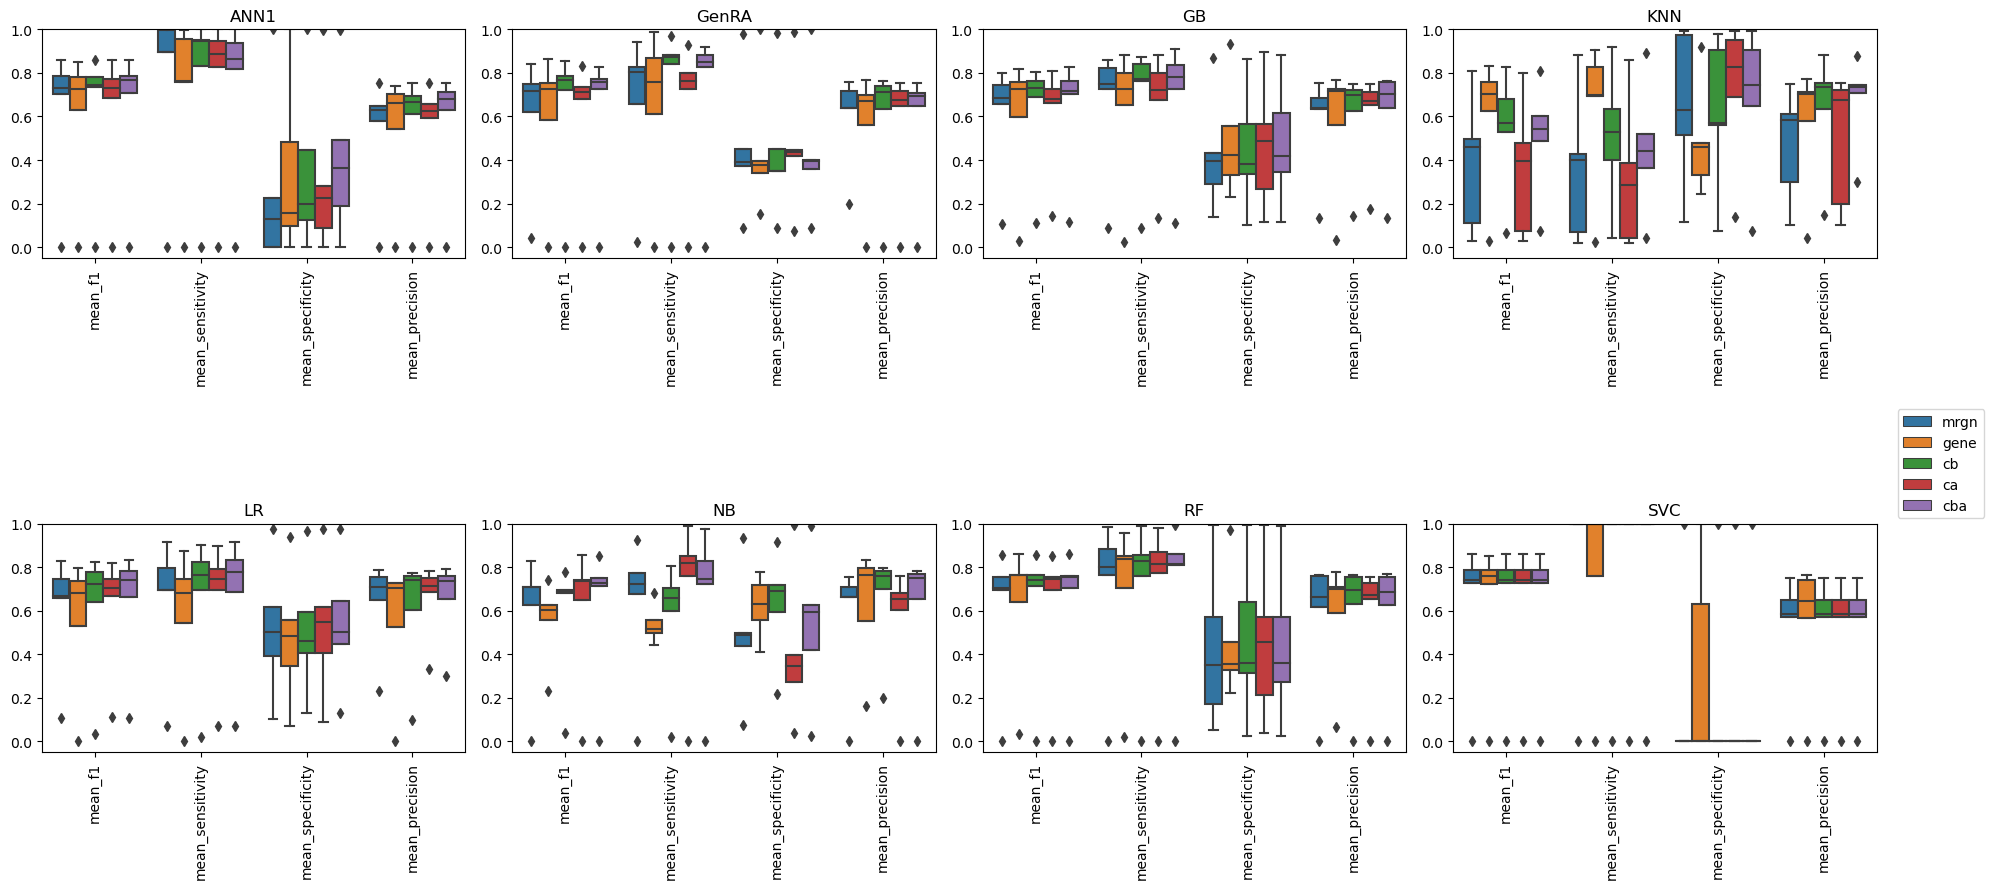

In [52]:

f = plt.figure(figsize = (20,9))
k=0
for e in ['ANN1', 'GenRA', 'GB', 'KNN', 'LR', 'NB', 'RF', 'SVC']:
    k+=1
    ax = plt.subplot(2, 4, k)
    g = sns.boxplot(x = 'perf', y = 'value', hue = 'dt', data = liver_melt[liver_melt['classifier'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.tight_layout()
f.savefig(figures_dir+'FigureS2.png', dpi = 300)

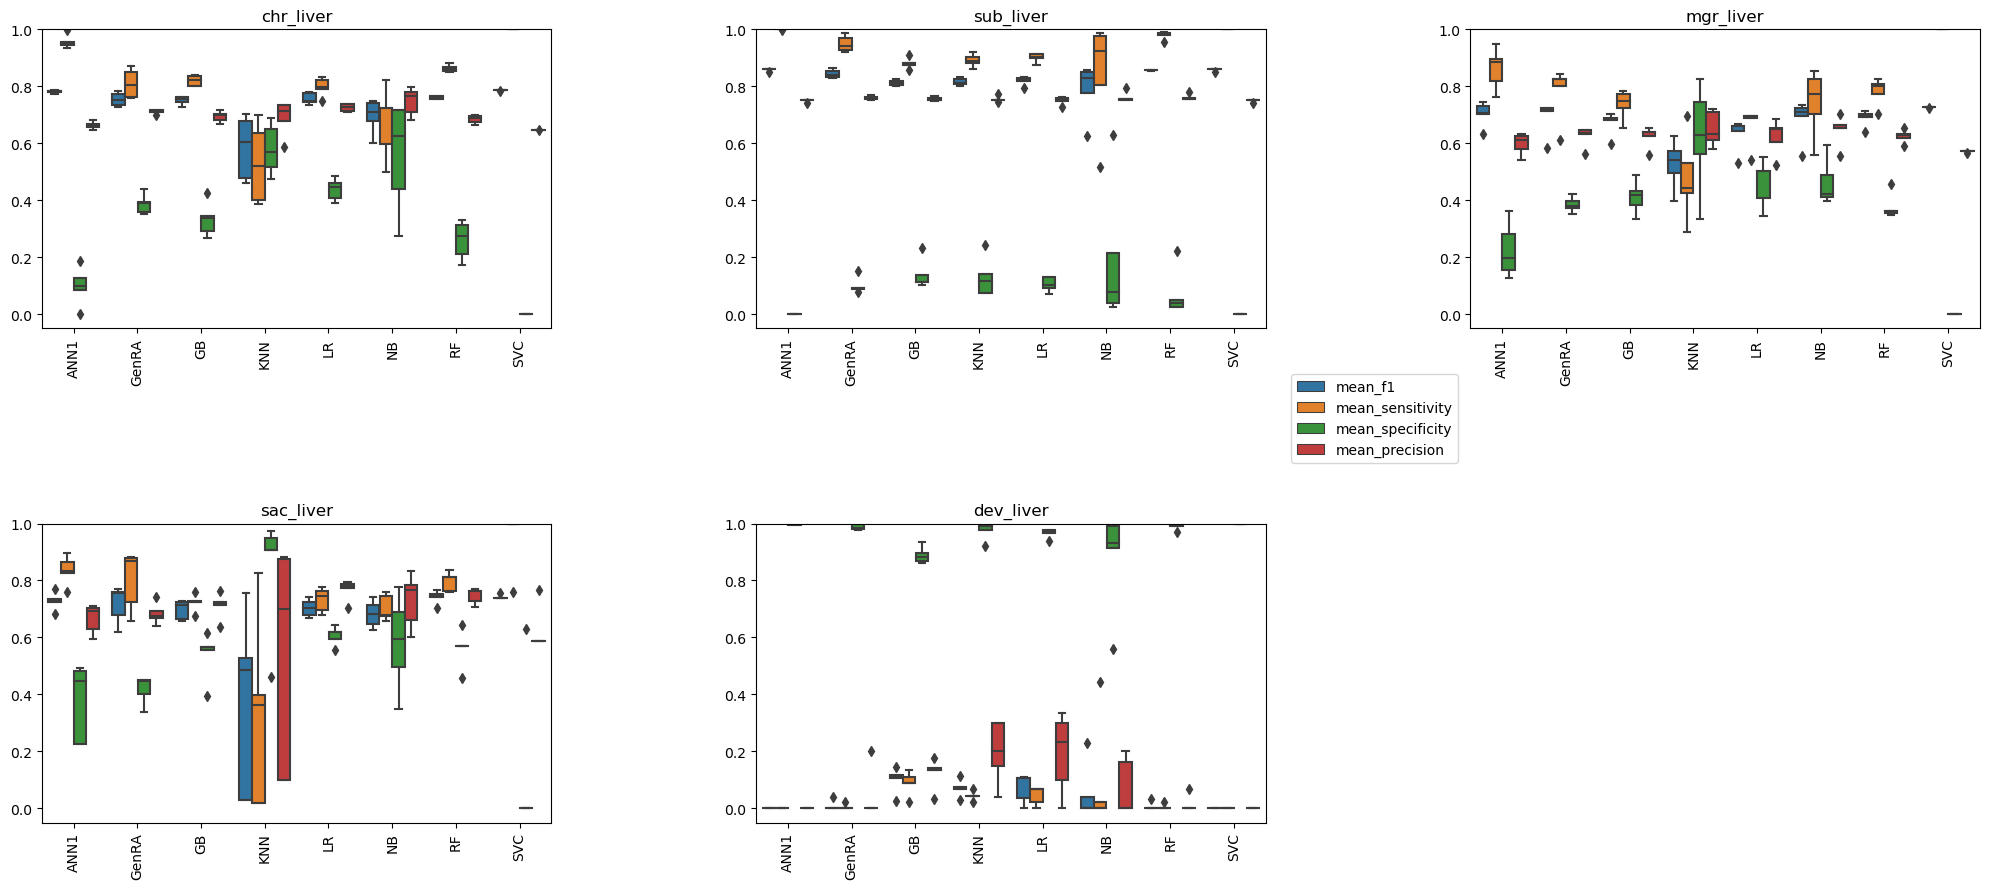

In [53]:
f = plt.figure(figsize = (20,9))
k=0
for e in liver_melt.tox.unique().tolist():
    k+=1
    ax = plt.subplot(2, 3, k)
    g = sns.boxplot(x = 'classifier', y = 'value', hue = 'perf', data = liver_melt[liver_melt['tox'] == e])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.tight_layout()

In [54]:
liver_melt.tox.unique().tolist()

['chr_liver', 'sub_liver', 'mgr_liver', 'sac_liver', 'dev_liver']

In [80]:
liver_only.groupby('tox').agg({'mean_f1': np.mean})

,mean_f1
tox,
chr_liver,0.733775
dev_liver,0.039100
mgr_liver,0.665650
sac_liver,0.672450
sub_liver,0.831150


In [87]:
liver_only

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,pos,neg,total,mean_BA
16,chr_liver,ANN1,0.785,0.005,0.996,0.010,0.000,0.000,0.646,0.007,0.647,0.006,mrgn,325.0,191.0,516.0,0.4980
17,chr_liver,GenRA,0.751,0.041,0.804,0.133,0.390,0.235,0.659,0.035,0.717,0.050,mrgn,325.0,191.0,516.0,0.5970
18,chr_liver,GB,0.744,0.027,0.822,0.075,0.291,0.128,0.635,0.028,0.683,0.032,mrgn,325.0,191.0,516.0,0.5565
19,chr_liver,KNN,0.461,0.172,0.402,0.200,0.516,0.175,0.442,0.083,0.586,0.096,mrgn,325.0,191.0,516.0,0.4590
20,chr_liver,LR,0.746,0.053,0.796,0.119,0.391,0.128,0.654,0.049,0.708,0.032,mrgn,325.0,191.0,516.0,0.5935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,dev_liver,KNN,0.076,0.105,0.044,0.061,0.991,0.012,0.836,0.009,0.300,0.447,cba,66.0,331.0,397.0,0.5175
132,dev_liver,LR,0.106,0.148,0.069,0.101,0.977,0.032,0.828,0.034,0.300,0.447,cba,66.0,331.0,397.0,0.5230
133,dev_liver,NB,0.000,0.000,0.000,0.000,0.991,0.020,0.828,0.014,0.000,0.000,cba,66.0,331.0,397.0,0.4955
134,dev_liver,RF,0.000,0.000,0.000,0.000,0.991,0.013,0.828,0.018,0.000,0.000,cba,66.0,331.0,397.0,0.4955


In [81]:
for e in ['mean_f1', 'std_f1', 'mean_sensitivity', 'std_sensitivity', 'mean_specificity', 'std_specificity',
       'mean_precision', 'std_precision',  'pos', 'neg', 'total']:
    liver_only[e] = liver_only[e].astype(float)

/tmp/ipykernel_1862651/4061482935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_only[e] = liver_only[e].astype(float)


In [82]:
liver_only[liver_only['tox'].isin(['chr_liver', 'sub_liver', 'sac_liver'])].agg({'mean_f1':np.mean, 'mean_sensitivity': np.mean, 'mean_specificity': np.mean, 'mean_precision' : np.mean})

mean_f1             0.745792
mean_sensitivity    0.823250
mean_specificity    0.309983
mean_precision      0.710875
dtype: float64

In [83]:
liver_only[liver_only['tox'].isin(['chr_liver', 'sub_liver', 'sac_liver'])].groupby(['classifier', 'dt']).agg({'mean_f1':np.mean, 'mean_specificity' :np.mean, 'mean_precision' : np.mean, 'mean_sensitivity': np.mean})

mean_f1  mean_specificity  mean_precision  mean_sensitivity
classifier dt                                                                
ANN1       ca    0.772333          0.103667        0.667333          0.924000
           cb    0.792333          0.191000        0.704333          0.927000
           cba   0.805333          0.227333        0.715000          0.933667
           gene  0.784333          0.193000        0.702000          0.903333
           mrgn  0.791667          0.075000        0.676000          0.964667
GB         ca    0.733667          0.316000        0.711333          0.785667
           cb    0.765333          0.335000        0.722333          0.824667
           cba   0.768000          0.358333        0.741000          0.823333
           gene  0.767000          0.404333        0.736667          0.803333
           mrgn  0.733667          0.274667        0.690000          0.801667
GenRA      ca    0.747667          0.320333        0.715333          0.804667
           cb    0.802667          0.296667        0.739667          0.908000
           cba   0.786333          0.282333        0.718333          0.883333
           gene  0.782000          0.295333        0.712333          0.872000
           mrgn  0.736667          0.310000        0.704667          0.801333
KNN        ca    0.435667          0.593000        0.509667          0.420667
           cb    0.678000          0.517000        0.790333          0.651000
           cba   0.633667          0.543333        0.784667          0.591667
           gene  0.764667          0.393667        0.729000          0.809000
           mrgn  0.433000          0.535333        0.479000          0.433333
LR         ca    0.756000          0.372333        0.747667          0.811333
           cb    0.775000          0.395000        0.756667          0.828667
           cba   0.784667          0.406333        0.763667          0.842000
           gene  0.737000          0.370000        0.719667          0.766667
           mrgn  0.747333          0.370667        0.751000          0.802000
NB         ca    0.748333          0.219667        0.680333          0.855667
           cb    0.713000          0.541000        0.779000          0.686000
           cba   0.770000          0.414667        0.767000          0.814333
           gene  0.656000          0.707667        0.797333          0.564333
           mrgn  0.721333          0.337333        0.707333          0.775000
RF         ca    0.784333          0.273000        0.718667          0.886333
           cb    0.788000          0.326333        0.738000          0.867667
           cba   0.791000          0.289333        0.737667          0.888000
           gene  0.796333          0.336333        0.728333          0.880667
           mrgn  0.771667          0.264000        0.728333          0.875333
SVC        ca    0.795000          0.000000        0.662000          1.000000
           cb    0.795000          0.000000        0.662000          1.000000
           cba   0.795000          0.000000        0.662000          1.000000
           gene  0.797667          0.210333        0.717333          0.919667
           mrgn  0.795000          0.000000        0.662000          1.000000

In [84]:
liver_only[liver_only['tox'].isin(['chr_liver', 'sub_liver', 'sac_liver'])].groupby(['classifier', 'tox']).agg({'mean_f1':np.mean, 'mean_sensitivity' :np.mean, 'mean_precision' : np.mean, 'mean_specificity': np.mean})

mean_f1  mean_sensitivity  mean_precision  \
classifier tox                                                    
ANN1       chr_liver   0.7820            0.9562          0.6624   
           sac_liver   0.7286            0.8362          0.6668   
           sub_liver   0.8570            0.9992          0.7496   
GB         chr_liver   0.7500            0.8194          0.6942   
           sac_liver   0.6978            0.7226          0.7116   
           sub_liver   0.8128            0.8812          0.7550   
GenRA      chr_liver   0.7532            0.8096          0.7108   
           sac_liver   0.7164            0.8028          0.6838   
           sub_liver   0.8436            0.9492          0.7596   
KNN        chr_liver   0.5850            0.5282          0.6888   
           sac_liver   0.3662            0.3244          0.5320   
           sub_liver   0.8158            0.8908          0.7548   
LR         chr_liver   0.7572            0.7982          0.7246   
           sac_liver   0.7038            0.7314          0.7678   
           sub_liver   0.8190            0.9008          0.7508   
NB         chr_liver   0.6954            0.6728          0.7462   
           sac_liver   0.6826            0.7030          0.7296   
           sub_liver   0.7872            0.8414          0.7628   
RF         chr_liver   0.7608            0.8626          0.6838   
           sac_liver   0.7416            0.7970          0.7458   
           sub_liver   0.8564            0.9792          0.7610   
SVC        chr_liver   0.7866            1.0000          0.6476   
           sac_liver   0.7426            0.9518          0.6218   
           sub_liver   0.8574            1.0000          0.7498   

                      mean_specificity  
classifier tox                          
ANN1       chr_liver            0.0996  
           sac_liver            0.3744  
           sub_liver            0.0000  
GB         chr_liver            0.3326  
           sac_liver            0.5402  
           sub_liver            0.1402  
GenRA      chr_liver            0.3864  
           sac_liver            0.4172  
           sub_liver            0.0992  
KNN        chr_liver            0.5800  
           sac_liver            0.8396  
           sub_liver            0.1298  
LR         chr_liver            0.4380  
           sac_liver            0.6064  
           sub_liver            0.1042  
NB         chr_liver            0.5544  
           sac_liver            0.5810  
           sub_liver            0.1968  
RF         chr_liver            0.2596  
           sac_liver            0.5614  
           sub_liver            0.0724  
SVC        chr_liver            0.0000  
           sac_liver            0.1262  
           sub_liver            0.0000

In [85]:
liver_only[liver_only['tox'].isin(['dev_liver'])].groupby(['classifier', 'tox']).agg({'mean_f1':np.mean, 'mean_precision' : np.mean, 'mean_specificity': np.mean, 'mean_sensitivity': np.mean})

,,mean_f1,mean_precision,mean_specificity,mean_sensitivity
classifier,tox,,,,
ANN1,dev_liver,0.0000,0.0000,0.9980,0.0000
GB,dev_liver,0.1008,0.1240,0.8882,0.0888
GenRA,dev_liver,0.0080,0.0400,0.9890,0.0044
KNN,dev_liver,0.0716,0.1980,0.9740,0.0446
LR,dev_liver,0.0720,0.1932,0.9666,0.0458
NB,dev_liver,0.0538,0.0726,0.8778,0.0932
RF,dev_liver,0.0066,0.0134,0.9890,0.0044
SVC,dev_liver,0.0000,0.0000,1.0000,0.0000


In [86]:
liver_only[liver_only['tox'].isin(['dev_liver'])].agg({'mean_f1':np.mean, 'mean_specificity' :np.mean, 'mean_precision' : np.mean, 'mean_sensitivity': np.mean})

mean_f1             0.039100
mean_specificity    0.960325
mean_precision      0.080150
mean_sensitivity    0.035150
dtype: float64

In [66]:
liver_only[liver_only['tox'].isin(['dev_liver'])].groupby(['classifier', 'dt']).agg({'mean_f1':np.mean, 'mean_specificity' :np.mean, 'mean_precision' : np.mean, 'mean_sensitivity': np.mean})

mean_f1  mean_specificity  mean_precision  mean_sensitivity
classifier dt                                                               
ANN1       ca      0.000             0.995           0.000             0.000
           cb      0.000             1.000           0.000             0.000
           cba     0.000             0.995           0.000             0.000
           gene    0.000             1.000           0.000             0.000
           mrgn    0.000             1.000           0.000             0.000
GB         ca      0.144             0.895           0.177             0.133
           cb      0.109             0.863           0.142             0.089
           cba     0.117             0.881           0.135             0.111
           gene    0.027             0.934           0.033             0.022
           mrgn    0.107             0.868           0.133             0.089
GenRA      ca      0.000             0.986           0.000             0.000
           cb      0.000             0.982           0.000             0.000
           cba     0.000             1.000           0.000             0.000
           gene    0.000             1.000           0.000             0.000
           mrgn    0.040             0.977           0.200             0.022
KNN        ca      0.073             0.991           0.200             0.044
           cb      0.067             0.977           0.150             0.044
           cba     0.076             0.991           0.300             0.044
           gene    0.029             0.920           0.040             0.022
           mrgn    0.113             0.991           0.300             0.069
LR         ca      0.111             0.977           0.333             0.069
           cb      0.036             0.968           0.100             0.022
           cba     0.106             0.977           0.300             0.069
           gene    0.000             0.938           0.000             0.000
           mrgn    0.107             0.973           0.233             0.069
NB         ca      0.000             0.995           0.000             0.000
           cb      0.040             0.913           0.200             0.022
           cba     0.000             0.991           0.000             0.000
           gene    0.229             0.558           0.163             0.444
           mrgn    0.000             0.932           0.000             0.000
RF         ca      0.000             0.995           0.000             0.000
           cb      0.000             0.995           0.000             0.000
           cba     0.000             0.991           0.000             0.000
           gene    0.033             0.969           0.067             0.022
           mrgn    0.000             0.995           0.000             0.000
SVC        ca      0.000             1.000           0.000             0.000
           cb      0.000             1.000           0.000             0.000
           cba     0.000             1.000           0.000             0.000
           gene    0.000             1.000           0.000             0.000
           mrgn    0.000             1.000           0.000             0.000